<a href="https://colab.research.google.com/github/MasterNathan01/4105/blob/main/WatersNathan_801283595_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:744: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic

Accuracy: 0.8181818181818182
Precision: 0.7435897435897436
Recall: 0.6170212765957447
F1 Score: 0.6744186046511628


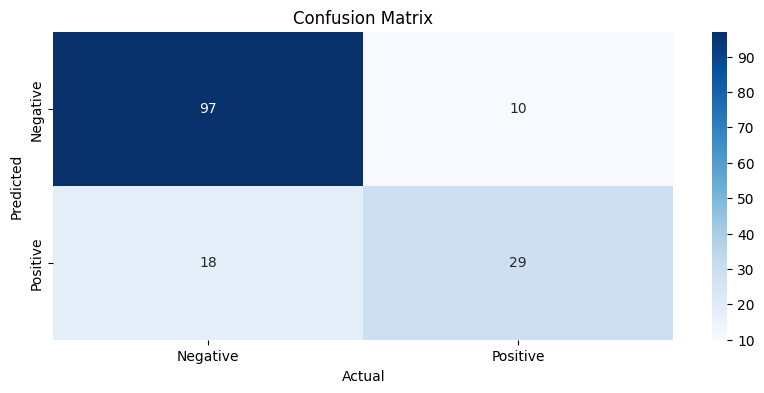

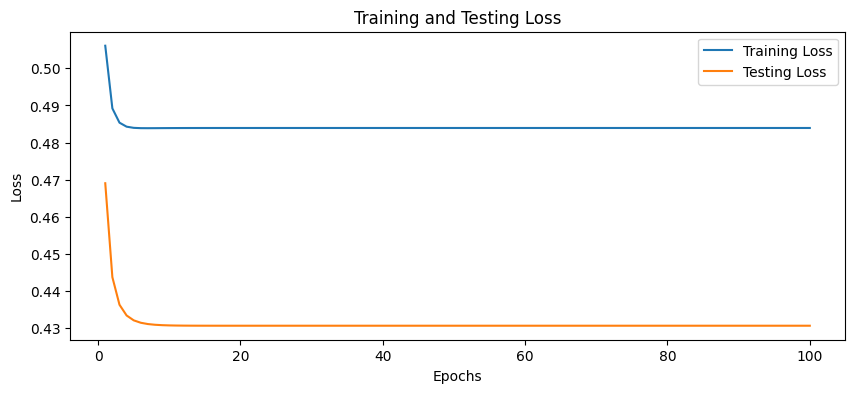

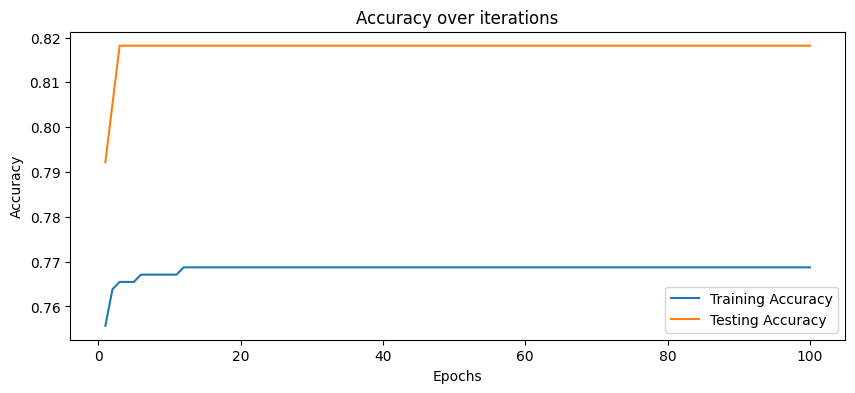

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

#load dataset
url ='https://raw.githubusercontent.com/HamedTabkhi/Intro-to-ML/refs/heads/main/Dataset/diabetes.csv'
dataset = pd.read_csv(url)

#seperating I/O
X = dataset.drop('Outcome', axis=1).values
y = dataset['Outcome'].values

#training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

#standardize
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#storing loss and accuracy
epochs = 100
train_loss = []
train_accuracy = []
test_loss = []
test_accuracy = []

sgd_clf = SGDClassifier(loss= 'log_loss', max_iter=1, warm_start=True, penalty=None, learning_rate = 'constant', eta0=0.01, random_state=0)

for epoch in range(epochs):
  sgd_clf.fit(X_train_scaled, y_train)
  y_train_proba = sgd_clf.predict_proba(X_train_scaled)
  y_test_proba = sgd_clf.predict_proba(X_test_scaled)
  train_loss_epoch = log_loss(y_train, y_train_proba)
  train_accuracy_epoch = sgd_clf.score(X_train_scaled, y_train)
  train_loss.append(train_loss_epoch)
  train_accuracy.append(train_accuracy_epoch)
  test_loss_epoch = log_loss(y_test, y_test_proba)
  test_accuracy_epoch = sgd_clf.score(X_test_scaled, y_test)
  test_loss.append(test_loss_epoch)
  test_accuracy.append(test_accuracy_epoch)



#predict
y_pred = sgd_clf.predict(X_test_scaled)
#confusion matrix
cfn_matrix = confusion_matrix(y_test, y_pred)
#accuracy
accuracy = accuracy_score(y_test, y_pred)
#precision
precision = precision_score(y_test, y_pred)
#recall
recall = recall_score(y_test, y_pred)
#f1 score
f1 = f1_score(y_test, y_pred)

#print
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

class_name = ['Negative', 'Positive']
cnf_matrix_df = pd.DataFrame(cfn_matrix, index=class_name, columns=class_name)

plt.figure(figsize=(10, 4))
sns.heatmap(cnf_matrix_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

#plotting loss
plt.figure(figsize=(10,4))
plt.plot(range(1, epochs +1), train_loss, label='Training Loss')
plt.plot(range(1, epochs +1), test_loss, label='Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Testing Loss')
plt.legend()
plt.show()

#plotting accuracy
plt.figure(figsize=(10,4))
plt.plot(range(1, epochs +1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs +1), test_accuracy, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over iterations')
plt.legend()
plt.show()

without weight
Accuracy: 0.9473684210526315
Precision: 0.9361702127659575
Recall: 0.9361702127659575
F1 Score: 0.9361702127659575

With weight (L2 Penalty):
Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106383


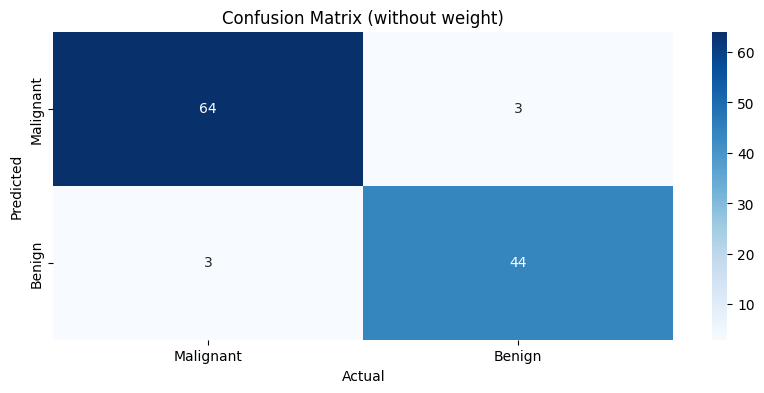

In [32]:
#Question 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data_cancer = load_breast_cancer()

df_cancer = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
df_cancer['target'] = data_cancer.target

df_cancer.head()

X_cancer = df_cancer.drop('target', axis=1).values
y_cancer = df_cancer['target']

#Malignant = 0
#Benign  = 1

y_cancer = y_cancer.map({0: 1, 1: 0})

#train/test
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, test_size=0.20, random_state=0)

#standardize
scaler_cancer = StandardScaler()
X_train_cancer_scaled = scaler_cancer.fit_transform(X_train_cancer)
X_test_cancer_scaled = scaler_cancer.transform(X_test_cancer)

classifer_cancer = LogisticRegression(penalty=None, solver='saga', max_iter=5000, random_state=0)

classifer_cancer.fit(X_train_cancer_scaled, y_train_cancer)

y_pred_cancer = classifer_cancer.predict(X_test_cancer_scaled)

cnf_matrix_cancer = confusion_matrix(y_test_cancer, y_pred_cancer)

accuracy_cancer = accuracy_score(y_test_cancer, y_pred_cancer)
precision_cancer = precision_score(y_test_cancer, y_pred_cancer)
recall_cancer = recall_score(y_test_cancer, y_pred_cancer)
f1_cancer = f1_score(y_test_cancer, y_pred_cancer)

print("without weight")
print("Accuracy:", accuracy_cancer)
print("Precision:", precision_cancer)
print("Recall:", recall_cancer)
print("F1 Score:", f1_cancer)

#part 2
classifier_cancer_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', max_iter=1000, random_state=0)

classifier_cancer_reg.fit(X_train_cancer_scaled, y_train_cancer)

y_pred_cancer_reg = classifier_cancer_reg.predict(X_test_cancer_scaled)

accuracy_cancer_reg = accuracy_score(y_test_cancer, y_pred_cancer_reg)
precision_cancer_reg = precision_score(y_test_cancer, y_pred_cancer_reg)
recall_cancer_reg = recall_score(y_test_cancer, y_pred_cancer_reg)
f1_cancer_reg = f1_score(y_test_cancer, y_pred_cancer_reg)

print("\nWith weight (L2 Penalty):")
print("Accuracy:", accuracy_cancer_reg)
print("Precision:", precision_cancer_reg)
print("Recall:", recall_cancer_reg)
print("F1 Score:", f1_cancer_reg)

class_names_cancer = ['Malignant', 'Benign']
cnf_matrix_cancer_reg_df = pd.DataFrame(cnf_matrix_cancer, index=class_names_cancer, columns=class_names_cancer)

plt.figure(figsize=(10, 4))
sns.heatmap(cnf_matrix_cancer_reg_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (without weight)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()



Naive Bayes Classifier:
Accuracy: 0.9035087719298246
Precision: 0.875
Recall: 0.8936170212765957
F1 Score: 0.8842105263157894


Text(95.72222222222221, 0.5, 'Predicted')

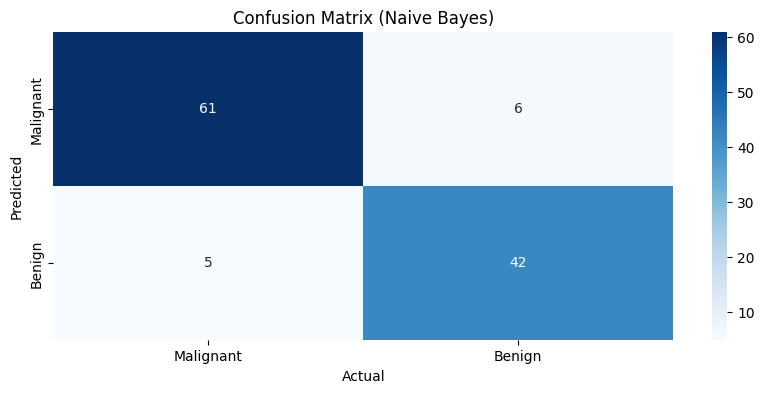

In [33]:
#Question 3
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()

nb_classifier.fit(X_train_cancer_scaled, y_train_cancer)

y_pred_nb = nb_classifier.predict(X_test_cancer_scaled)

accuracy_nb = accuracy_score(y_test_cancer, y_pred_nb)
precision_nb = precision_score(y_test_cancer, y_pred_nb)
recall_nb = recall_score(y_test_cancer, y_pred_nb)
f1_nb = f1_score(y_test_cancer, y_pred_nb)

print("\nNaive Bayes Classifier:")
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("Recall:", recall_nb)
print("F1 Score:", f1_nb)

class_names_nb = ['Malignant', 'Benign']
cnf_matrix_nb = confusion_matrix(y_test_cancer, y_pred_nb)

cnf_matrix_nb_df = pd.DataFrame(cnf_matrix_nb, index=class_names_nb, columns=class_names_nb)

plt.figure(figsize=(10, 4))
sns.heatmap(cnf_matrix_nb_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix (Naive Bayes)')
plt.xlabel('Actual')
plt.ylabel('Predicted')



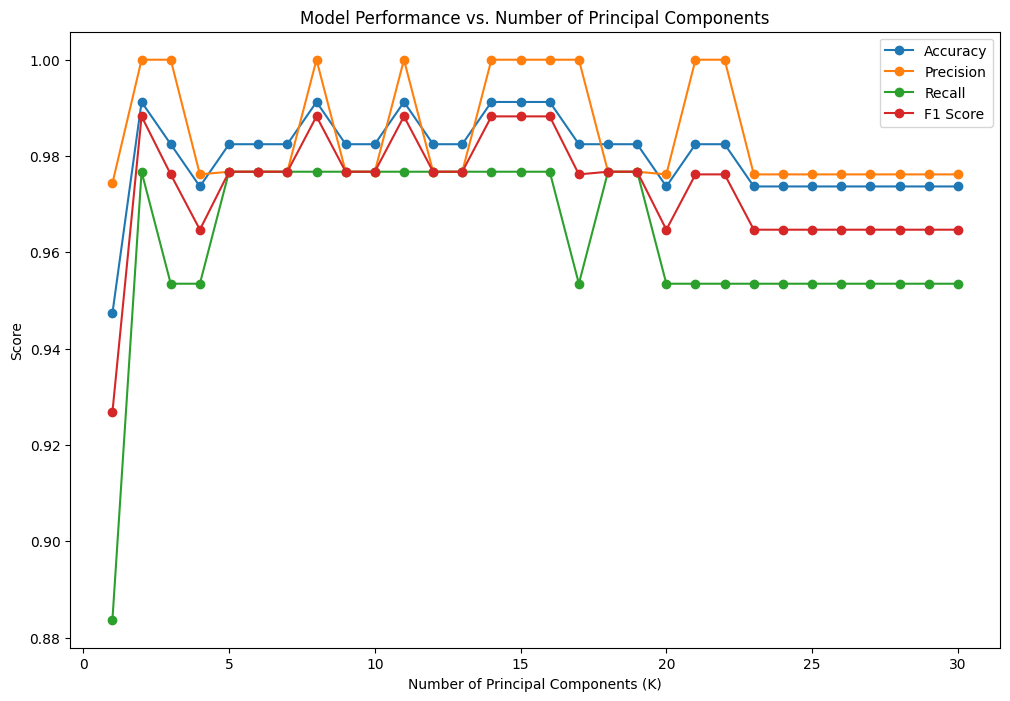

Optimal number of principal components: 2
Optimal Accuracy: 0.9912
Optimal Precision: 1.0000
Optimal Recall: 0.9767
Optimal F1 Score: 0.9882

Comparison with Previous Models:
Logistic Regression with PCA (K=2):
Accuracy: 0.9912
Precision: 1.0000
Recall: 0.9767
F1 Score: 0.9882

Naive Bayes Model:
Accuracy: 0.9035
Precision: 0.8750
Recall: 0.8936
F1 Score: 0.8842


In [35]:
from sklearn.decomposition import PCA
data = load_breast_cancer()
X = data.data
y = data.target

y = np.where(y == 0, 'Malignant', 'Benign')

#standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

def train_and_evaluate(X, y, n_components):

    pca = PCA(n_components=n_components)
    X_pca = pca.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='Malignant')
    recall = recall_score(y_test, y_pred, pos_label='Malignant')
    f1 = f1_score(y_test, y_pred, pos_label='Malignant')

    return accuracy, precision, recall, f1

K_range = range(1, min(X.shape[1], 30) + 1)


accuracies, precisions, recalls, f1_scores = [], [], [], []


for K in K_range:
    acc, prec, rec, f1 = train_and_evaluate(X_scaled, y, K)
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f1_scores.append(f1)

optimal_K = K_range[np.argmax(accuracies)]
best_accuracy = max(accuracies)
best_precision = precisions[np.argmax(accuracies)]
best_recall = recalls[np.argmax(accuracies)]
best_f1 = f1_scores[np.argmax(accuracies)]

plt.figure(figsize=(12, 8))
plt.plot(K_range, accuracies, marker='o', label='Accuracy')
plt.plot(K_range, precisions, marker='o', label='Precision')
plt.plot(K_range, recalls, marker='o', label='Recall')
plt.plot(K_range, f1_scores, marker='o', label='F1 Score')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.title('Model Performance vs. Number of Principal Components')
plt.legend()
plt.show()

print(f"Optimal number of principal components: {optimal_K}")
print(f"Optimal Accuracy: {best_accuracy:.4f}")
print(f"Optimal Precision: {best_precision:.4f}")
print(f"Optimal Recall: {best_recall:.4f}")
print(f"Optimal F1 Score: {best_f1:.4f}")

accuracy_nb = accuracy_nb
precision_nb = precision_nb
recall_nb = recall_nb
f1_nb = f1_nb

print("\nComparison with Previous Models:")

print(f"Logistic Regression with PCA (K={optimal_K}):")
print(f"Accuracy: {best_accuracy:.4f}")
print(f"Precision: {best_precision:.4f}")
print(f"Recall: {best_recall:.4f}")
print(f"F1 Score: {best_f1:.4f}")

print("\nNaive Bayes Model:")
print(f"Accuracy: {accuracy_nb:.4f}")
print(f"Precision: {precision_nb:.4f}")
print(f"Recall: {recall_nb:.4f}")
print(f"F1 Score: {f1_nb:.4f}")

In [27]:
# Split the data
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# Train Logistic Regression model without PCA
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train_lr, y_train_lr)

# Make predictions
y_pred_lr = lr_model.predict(X_test_lr)

# Calculate metrics
accuracy_lr = accuracy_score(y_test_lr, y_pred_lr)
precision_lr = precision_score(y_test_lr, y_pred_lr, pos_label='Malignant')
recall_lr = recall_score(y_test_lr, y_pred_lr, pos_label='Malignant')
f1_lr = f1_score(y_test_lr, y_pred_lr, pos_label='Malignant')

# Print results
print("Logistic Regression Model Results (without PCA):")
print(f"Accuracy: {accuracy_lr:.4f}")
print(f"Precision: {precision_lr:.4f}")
print(f"Recall: {recall_lr:.4f}")
print(f"F1 Score: {f1_lr:.4f}")

# Compare with previous models
print("\nComparison with Previous Models:")
print("1. Logistic Regression (without PCA):")
print(f"   Accuracy: {accuracy_lr:.4f}")
print(f"   Precision: {precision_lr:.4f}")
print(f"   Recall: {recall_lr:.4f}")
print(f"   F1 Score: {f1_lr:.4f}")

print(f"\n2. Logistic Regression with PCA (K={optimal_K}):")
print(f"   Accuracy: {best_accuracy:.4f}")
print(f"   Precision: {best_precision:.4f}")
print(f"   Recall: {best_recall:.4f}")
print(f"   F1 Score: {best_f1:.4f}")

print("\n3. Naive Bayes Model:")
print(f"   Accuracy: {accuracy_nb:.4f}")
print(f"   Precision: {precision_nb:.4f}")
print(f"   Recall: {recall_nb:.4f}")
print(f"   F1 Score: {f1_nb:.4f}")



Logistic Regression Model Results (without PCA):
Accuracy: 0.9737
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647

Comparison with Previous Models:
1. Logistic Regression (without PCA):
   Accuracy: 0.9737
   Precision: 0.9762
   Recall: 0.9535
   F1 Score: 0.9647

2. Logistic Regression with PCA (K=2):
   Accuracy: 0.9912
   Precision: 1.0000
   Recall: 0.9767
   F1 Score: 0.9882

3. Naive Bayes Model:
   Accuracy: 0.9035
   Precision: 0.8750
   Recall: 0.8936
   F1 Score: 0.8842
